In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gun-violence-data/gun-violence-data_01-2013_03-2018.csv


**What do I want to find from this dataset?**
- State with most gun violence
    - Create graph from matplot.lib library using seaborne for color presentation
- Count of victims and Suspects. Possibility of ratio between the two
    - Genearte two sepearte columns for victims and suspects, currenlty they're in a single column
- Graph of relation between male and female victims vs suspects to find a possible correlation
- Create a model by using train_split_model, scikit-learn library (may be no need)

**What have i done:**
1. Loaded the csv data into a dataframe
2. Observed the dattypes and column name/formatting
    * Methods used: describe, head, dtype, drop, columns, unique
3. Transform from object datatype to appropriate datatype
Note: Before I complete the object transformations need to create new columns w/in the values that have '::' delimiters

In [2]:
#Using the kaggle dataset 'Gun Violence' posted by James Ko
gun_vio_path = '../input/gun-violence-data/gun-violence-data_01-2013_03-2018.csv'

#Dataframe gun_data
gun_data = pd.read_csv(gun_vio_path)

* I have read the csv file into my new dataframe called 'gun_data'. Then I will be drop the columns I will not be using in the analysis. 

In [3]:
# The following are the columns dropped
# Longitude and Latitude may be used for a geographical graph

gun_data=gun_data.drop(['state_house_district','state_senate_district','address', 'participant_age', 'latitude', 'longitude', 'gun_stolen', 'gun_type'], axis=1)
gun_data=gun_data.drop(['incident_url', 'source_url', 'incident_url_fields_missing', 'sources'], axis=1)

gun_data.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'n_killed',
       'n_injured', 'congressional_district', 'incident_characteristics',
       'location_description', 'n_guns_involved', 'notes',
       'participant_age_group', 'participant_gender', 'participant_name',
       'participant_relationship', 'participant_status', 'participant_type'],
      dtype='object')

* Afterwards I want to obtain an overview of the columns and their datatypes by using describe and dtypes method

In [4]:
# Individually check the columns to learn additional information
gun_data.participant_relationship.unique()

# Conclusion: The relationship column needs to be transformed to be easier to read and understand

array([nan, '3::Family', '5::Family',
       '4::Drive by - Random victims||5::Drive by - Random victims||6::Drive by - Random victims',
       '7::Aquaintance', '5::Gang vs Gang||6::Gang vs Gang',
       '4::Gang vs Gang', '6::Significant others - current or former',
       '4::Armed Robbery', '4::Significant others - current or former',
       '0::Family', '4::Gang vs Gang||5::Gang vs Gang', '4::Family',
       '4::Armed Robbery||5::Armed Robbery||6::Armed Robbery||7::Armed Robbery',
       '5::Gang vs Gang', '4::Mass shooting - Random victims',
       '6::Mass shooting - Perp Knows Victims',
       '8::Significant others - current or former', '4::Co-worker',
       '15::Co-worker',
       '13::Gang vs Gang||14::Gang vs Gang||15::Gang vs Gang||16::Gang vs Gang||17::Gang vs Gang||18::Gang vs Gang||19::Gang vs Gang',
       '4::Neighbor', '5::Significant others - current or former',
       '4::Friends', '1::Significant others - current or former',
       '9::Mass shooting - Random vict

In [5]:
#Check the data type of all columns
gun_data.dtypes

# Conclusion: Most values are object types - use astype() to convert 

incident_id                   int64
date                         object
state                        object
city_or_county               object
n_killed                      int64
n_injured                     int64
congressional_district      float64
incident_characteristics     object
location_description         object
n_guns_involved             float64
notes                        object
participant_age_group        object
participant_gender           object
participant_name             object
participant_relationship     object
participant_status           object
participant_type             object
dtype: object

* Now that we have checked the datatypes we see there are mostly object datatypes that need to be transformed to their appropriate datatypes.
* In addition there are many NaN values that I'd prefer to set to Unknown - use .fillna('')

In [6]:
# Change the NaN values
gun_data['location_description'] = gun_data['location_description'].fillna('Unknown')
gun_data['participant_relationship'] = gun_data['participant_relationship'].fillna('Unknown')
gun_data['participant_age_group'] = gun_data['participant_age_group'].fillna('Unknown')
gun_data['notes'] = gun_data['notes'].fillna('Unknown')
gun_data['participant_name'] = gun_data['participant_name'].fillna('Unknown')

# When there is a 0 it will stand for unknown
gun_data['n_guns_involved'] = gun_data['n_guns_involved'].fillna(0)



In [7]:
gun_data['date'] = pd.to_datetime(gun_data['date'])
gun_data.date.describe

# We can change multiple column types at once
column_data_types = {
     'n_killed': 'int',
    'n_injured': 'int',
    'incident_id': 'int',
    'congressional_district': 'float',
    'state': 'string',
    'city_or_county': 'string',
    'notes': 'string',
    'location_description': 'string',
    'participant_age_group': 'string'
}

gun_data = gun_data.astype(column_data_types)


In [8]:
gun_data.dtypes

incident_id                          int64
date                        datetime64[ns]
state                               string
city_or_county                      string
n_killed                             int64
n_injured                            int64
congressional_district             float64
incident_characteristics            object
location_description                string
n_guns_involved                    float64
notes                               string
participant_age_group               string
participant_gender                  object
participant_name                    object
participant_relationship            object
participant_status                  object
participant_type                    object
dtype: object

* Not done yet with the transformations - there are still columns with delimeters such as '::' and '||'
* The participant age group column is split into three different groups that I didn't notice until I ran .unique and <br> saw there is 'child', 'teen', and 'adult'

In [9]:
# Figured out that there are three categories not solely adult and teen
gun_data.participant_age_group.unique()

<StringArray>
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        '0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+',
                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [10]:
#Group by state, age, date
gun_data.head(3)
#gun_data.groupby(gun_data.state)

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,location_description,n_guns_involved,notes,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,Unknown,0.0,Julian Sims under investigation: Four Shot and...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,Unknown,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
1,460726,2013-01-01,California,Hawthorne,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Unknown,0.0,Four Shot; One Killed; Unidentified shooter in...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,Unknown,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...
2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Cotton Club,2.0,Unknown,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,Unknown,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...


* The following cells include loops to split the delimiters and create new columns

In [11]:
# Participant Age Group
# Initialize new columns for counts

gun_data['adults_count'] = 0
gun_data['minors_count'] = 0

# Iterate through each row in gun_data
for index, row in gun_data.iterrows():
    participant_age_group = row['participant_age_group']
    
    # Skip missing values (NaN)
    if pd.notna(participant_age_group):
        age_groups = participant_age_group.split('||')
        for age_group in age_groups:
            idx_age = age_group.split('::')
            if len(idx_age) == 2:  # Check if valid index and age_category
                idx, age_category = idx_age
                if age_category == 'Adult 18+':
                    gun_data.at[index, 'adults_count'] += 1
                elif age_category.startswith('Child') or age_category.startswith('Teen'):
                    gun_data.at[index, 'minors_count'] += 1

In [12]:
# Participant Age Group
# Initialize new columns for counts

gun_data['adults_count'] = 0
gun_data['minors_count'] = 0

# Iterate through each row in gun_data
for index, row in gun_data.iterrows():
    participant_age_group = row['participant_age_group']
    
    # Skip missing values (NaN)
    if pd.notna(participant_age_group):
        age_groups = participant_age_group.split('||')
        for age_group in age_groups:
            idx_age = age_group.split('::')
            if len(idx_age) == 2:  # Check if valid index and age_category
                idx, age_category = idx_age
                if age_category == 'Adult 18+':
                    gun_data.at[index, 'adults_count'] += 1
                elif age_category.startswith('Child') or age_category.startswith('Teen'):
                    gun_data.at[index, 'minors_count'] += 1


In [13]:
pd.set_option('max_colwidth', None)

gun_data.participant_type.head()

0             0::Victim||1::Victim||2::Victim||3::Victim||4::Subject-Suspect
1             0::Victim||1::Victim||2::Victim||3::Victim||4::Subject-Suspect
2    0::Subject-Suspect||1::Subject-Suspect||2::Victim||3::Victim||4::Victim
3                        0::Victim||1::Victim||2::Victim||3::Subject-Suspect
4                        0::Victim||1::Victim||2::Victim||3::Subject-Suspect
Name: participant_type, dtype: object

In [14]:
# Participant Type
# Initialize new columns for counts

gun_data['victim_count'] = 0
gun_data['suspect_count'] = 0

# Iterate through each row in gun_data
for index, row in gun_data.iterrows():
    participant_type = row['participant_type']
    
    # Skip missing values (NaN)
    if pd.notna(participant_type):
        age_groups = participant_type.split('||')
        for age_group in age_groups:
            idx_age = age_group.split('::')
            if len(idx_age) == 2:  # Check if valid index and category
                idx, age_category = idx_age
                if age_category == 'Victim':
                    gun_data.at[index, 'victim_count'] += 1
                elif age_category.startswith('Subject-Suspect'):
                    gun_data.at[index, 'suspect_count'] += 1


In [15]:
# Participant Type
# Initialize new columns for counts

gun_data['victim_count'] = 0
gun_data['suspect_count'] = 0

# Iterate through each row in gun_data
for index, row in gun_data.iterrows():
    participant_type = row['participant_type']
    
    # Skip missing values (NaN)
    if pd.notna(participant_type):
        age_groups = participant_type.split('||')
        for age_group in age_groups:
            idx_age = age_group.split('::')
            if len(idx_age) == 2:  # Check if valid index and category
                idx, age_category = idx_age
                if age_category == 'Victim':
                    gun_data.at[index, 'victim_count'] += 1
                elif age_category.startswith('Subject-Suspect'):
                    gun_data.at[index, 'suspect_count'] += 1


In [16]:
#Two columns were derived from participant_age_group, can now drop it
gun_data = gun_data.drop(['participant_age_group'], axis=1)

# Increase max_colwidth to display more content
pd.set_option('max_colwidth', None)

# Now when you display the DataFrame, the column values won't be truncated
gun_data.head(1)

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,location_description,n_guns_involved,notes,participant_gender,participant_name,participant_relationship,participant_status,participant_type,adults_count,minors_count,victim_count,suspect_count
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,"Shot - Wounded/Injured||Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)||Possession (gun(s) found during commission of other crimes)||Possession of gun by felon or prohibited person",Unknown,0.0,Julian Sims under investigation: Four Shot and Injured,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,Unknown,0::Arrested||1::Injured||2::Injured||3::Injured||4::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4::Subject-Suspect,5,0,4,1


In [17]:
gun_data.head(1)     

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,location_description,n_guns_involved,notes,participant_gender,participant_name,participant_relationship,participant_status,participant_type,adults_count,minors_count,victim_count,suspect_count
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,"Shot - Wounded/Injured||Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)||Possession (gun(s) found during commission of other crimes)||Possession of gun by felon or prohibited person",Unknown,0.0,Julian Sims under investigation: Four Shot and Injured,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,Unknown,0::Arrested||1::Injured||2::Injured||3::Injured||4::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4::Subject-Suspect,5,0,4,1


In [18]:
gun_data.groupby('state')['n_killed'].count().sort_values(ascending=False)


state
Illinois                17556
California              16306
Florida                 15029
Texas                   13577
Ohio                    10244
New York                 9712
Pennsylvania             8929
Georgia                  8925
North Carolina           8739
Louisiana                8103
Tennessee                7626
South Carolina           6939
Missouri                 6631
Michigan                 6136
Massachusetts            5981
Virginia                 5949
Indiana                  5852
Maryland                 5798
Alabama                  5471
New Jersey               5387
Wisconsin                4787
Kentucky                 4157
Mississippi              3599
Oklahoma                 3455
Washington               3434
Colorado                 3201
District of Columbia     3195
Connecticut              3067
Arkansas                 2842
Iowa                     2517
Minnesota                2408
Arizona                  2328
Oregon                   2286
Kans

In [19]:
earliest_date= gun_data['date'].max()
latest_date= gun_data['date'].min()
print(earliest_date, latest_date)

2018-03-31 00:00:00 2013-01-01 00:00:00


In [20]:
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

sns.set_theme(style="whitegrid")

state_stats = gun_data.groupby('state').agg({
    'n_killed': 'sum',
    'n_injured': 'sum',
}).reset_index()

# Create an interactive bar plot using Plotly Express
fig = px.bar(
    state_stats,
    x='state',
    y=['n_killed', 'n_injured'],
    title='State Statistics of Gun Violence (2013-2018)',
    labels={'state': 'State', 'value': 'Count'},
    template='plotly',
    color_discrete_sequence=['red', 'blue', 'green']
)
# function to show the plot
fig.show()



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


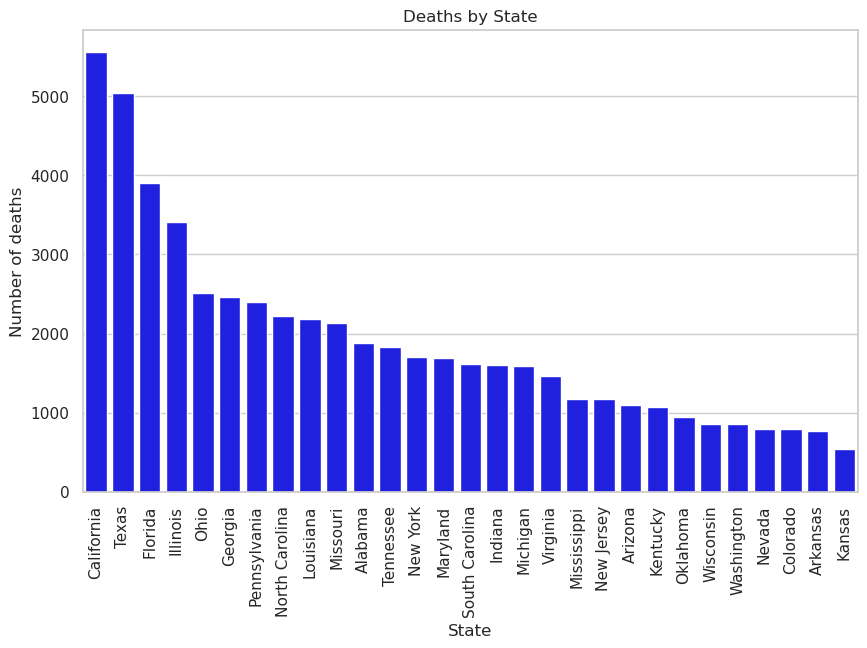

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_theme(style="whitegrid")

# Group data by state and calculate total deaths per state
state_death_counts = gun_data.groupby('state')['n_killed'].sum().sort_values(ascending=False)

# Set a threshold for the minimum number of deaths to display
min_deaths_threshold = 500  # Adjust this threshold as needed

# Filter states based on the threshold
selected_states = state_death_counts[state_death_counts >= min_deaths_threshold]

# Set Seaborn style
sns.set(style="whitegrid")

# Set Matplotlib figure size
plt.figure(figsize=(10, 6))

# Create a Seaborn bar plot
sns.barplot(x=selected_states.index, y=selected_states.values, color='blue')

plt.title('Deaths by State')
# naming the x axis
plt.xlabel('State')
# naming the y axis
plt.ylabel('Number of deaths')
  
plt.xticks(rotation=90)
  
# function to show the plot
plt.show()

In [22]:
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

sns.set_theme(style="whitegrid")

# Extract the year
gun_data['year'] = gun_data['date'].dt.year

# Group data by state and calculate total deaths per state
state_death_counts = gun_data.groupby('year')['n_killed'].sum().sort_values(ascending=False)

yearly_stats = gun_data.groupby('year').agg({
    'n_killed': 'sum',
    'n_injured': 'sum'
}).reset_index()

# Create an interactive bar plot using Plotly Express
fig = px.bar(
    yearly_stats,
    x='year',
    y=['n_killed', 'n_injured'],
    title='Yearly Statistics of Gun Violence',
    labels={'year': 'Year', 'value': 'Count'},
    template='plotly',
    color_discrete_sequence=['red', 'blue', 'green']
)
# function to show the plot
fig.show()



If participant_relationship == NaN change to None or decide to remove column if not relevant
* It's an interesting statistic to have 

Conclusion: I would have liked to do a male/female ratio of suspect to victim